Found 7697 images belonging to 355 classes.
Found 3560 images belonging to 355 classes.
Epoch 1/750
240/240 [==============================] - 101s 408ms/step - loss: 3.5842 - accuracy: 0.2663 - val_loss: 2.3960 - val_accuracy: 0.3975
Epoch 2/750
240/240 [==============================] - 94s 392ms/step - loss: 2.0384 - accuracy: 0.4586 - val_loss: 2.1688 - val_accuracy: 0.4409
Epoch 3/750
240/240 [==============================] - 94s 391ms/step - loss: 1.6811 - accuracy: 0.5268 - val_loss: 1.9992 - val_accuracy: 0.4735
Epoch 4/750
240/240 [==============================] - 99s 412ms/step - loss: 1.4694 - accuracy: 0.5679 - val_loss: 1.9925 - val_accuracy: 0.4879
Epoch 5/750
240/240 [==============================] - 98s 408ms/step - loss: 1.2838 - accuracy: 0.6222 - val_loss: 1.9433 - val_accuracy: 0.4992
Epoch 6/750
240/240 [==============================] - 94s 394ms/step - loss: 1.1510 - accuracy: 0.6527 - val_loss: 1.9080 - val_accuracy: 0.5138
Epoch 7/750
240/240 [==============

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



240/240 [==============================] - 92s 382ms/step - loss: 0.0618 - accuracy: 0.9708 - val_loss: 2.5527 - val_accuracy: 0.5673
Epoch 417/750
240/240 [==============================] - 96s 398ms/step - loss: 0.0662 - accuracy: 0.9683 - val_loss: 2.5815 - val_accuracy: 0.5636
Epoch 418/750
240/240 [==============================] - 95s 397ms/step - loss: 0.0605 - accuracy: 0.9705 - val_loss: 2.5704 - val_accuracy: 0.5724
Epoch 419/750
240/240 [==============================] - 95s 396ms/step - loss: 0.0635 - accuracy: 0.9673 - val_loss: 2.6030 - val_accuracy: 0.5698
Epoch 420/750
240/240 [==============================] - 95s 396ms/step - loss: 0.0659 - accuracy: 0.9675 - val_loss: 2.5777 - val_accuracy: 0.5755
Epoch 421/750
240/240 [==============================] - 96s 401ms/step - loss: 0.0613 - accuracy: 0.9717 - val_loss: 2.5652 - val_accuracy: 0.5709
Epoch 423/750
240/240 [==============================] - 95s 395ms/step - loss: 0.0662 - accuracy: 0.9692 - val_loss: 2.5756 -

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



240/240 [==============================] - 94s 392ms/step - loss: 0.0552 - accuracy: 0.9704 - val_loss: 2.6087 - val_accuracy: 0.5712
Epoch 580/750
240/240 [==============================] - 95s 394ms/step - loss: 0.0550 - accuracy: 0.9726 - val_loss: 2.6406 - val_accuracy: 0.5718
Epoch 582/750
240/240 [==============================] - 95s 395ms/step - loss: 0.0564 - accuracy: 0.9708 - val_loss: 2.6536 - val_accuracy: 0.5701
Epoch 583/750
240/240 [==============================] - 95s 398ms/step - loss: 0.0594 - accuracy: 0.9697 - val_loss: 2.6276 - val_accuracy: 0.5752
Epoch 584/750
240/240 [==============================] - 90s 376ms/step - loss: 0.0560 - accuracy: 0.9727 - val_loss: 2.6305 - val_accuracy: 0.5746
Epoch 586/750
240/240 [==============================] - 94s 393ms/step - loss: 0.0592 - accuracy: 0.9689 - val_loss: 2.6074 - val_accuracy: 0.5729
Epoch 587/750
240/240 [==============================] - 92s 384ms/step - loss: 0.0561 - accuracy: 0.9712 - val_loss: 2.5986 -

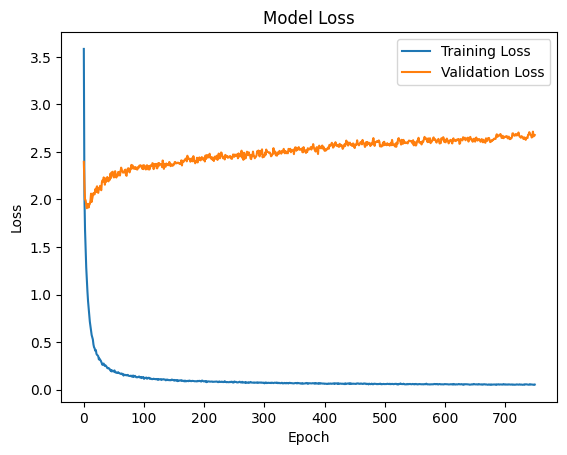

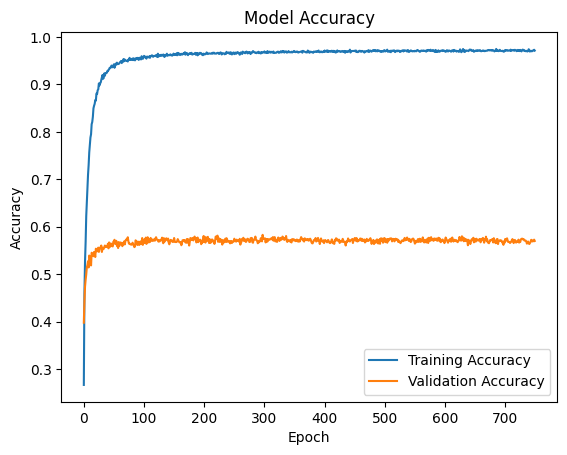

112/112 [==============================] - 20s 167ms/step
Accuracy: 0.5699438202247191
Average Precision: 0.5799646085560164
Average Recall: 0.5673539215088511
Average F1 Score: 0.5591755076395244


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications import InceptionV3

# Define data directories
train_data_dir = r"C:\Users\79894\Downloads\archive2_converted_train"
test_data_dir = r"C:\Users\79894\Downloads\archive2_converted_test"

# Define data generators with preprocessing_function (fixed image size)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of preprocessed images
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),  # Adjusted to match the GoogLeNet model input shape
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),  # Adjusted to match the GoogLeNet model input shape
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load pre-trained GoogLeNet model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of GoogLeNet
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(355, activation='softmax')(x)  # Adjust output neurons based on your classification task

# Combine base model and custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=SGD(learning_rate=1e-2, momentum=0.9, nesterov=True),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train your model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=750,  # Adjust as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Extract results from the final epoch
final_epoch_results = {
    'loss': history.history['loss'][-1],
    'accuracy': history.history['accuracy'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_accuracy': history.history['val_accuracy'][-1]
}

# Print the final epoch results
print("Final Epoch Results:")
print(final_epoch_results)

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot accuracy history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Evaluate the model on test data
validation_generator.reset()  # Reset the generator to start from the beginning
predictions = model.predict(validation_generator, steps=validation_generator.samples // batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(validation_generator.classes, predicted_classes)

# Calculate metrics
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)

precision = []
recall = []
f1_score = []

for i in range(355):  # Adjusted based on the number of classes
    true_positives = conf_matrix[i, i]
    false_positives = np.sum(conf_matrix[:, i]) - true_positives
    false_negatives = np.sum(conf_matrix[i, :]) - true_positives

    precision_i = true_positives / (true_positives + false_positives) if true_positives + false_positives != 0 else 0
    recall_i = true_positives / (true_positives + false_negatives) if true_positives + false_negatives != 0 else 0

    precision.append(precision_i)
    recall.append(recall_i)

    # Calculate F1 score
    if precision_i + recall_i != 0:
        f1_score_i = 2 * (precision_i * recall_i) / (precision_i + recall_i)
    else:
        f1_score_i = 0

    f1_score.append(f1_score_i)

# Calculate average precision, recall, and F1 score
avg_precision = np.mean(precision)
avg_recall = np.mean(recall)
avg_f1_score = np.mean(f1_score)

# Print the metrics
print("Accuracy:", accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1_score)
